In [ ]:
"""
PREDICTION OF RUL OF LITHIUM BATTERY
USING DECISION TREE
"""
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import time

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load dataset from CSV file
df=pd.read_csv('Battery_RUL_II cleaned 2.csv')

In [ ]:
df.head(15)

,Cycle_Index,Discharge_Time,Decrement,Max_Voltage_Discharge,Min_Voltage_Charge,Time,Time_constant_current,Charging_time,RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,7,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106
5,8,5955.30,1220.135329,4.013,3.501,5017.495000,5967.55,5967.55,1105
6,9,5951.20,1220.135329,4.014,3.501,5017.496000,5962.21,5962.21,1104
7,10,5945.44,1216.920914,4.014,3.501,5009.993667,5954.91,5954.91,1103
8,12,3228.58,1135.349333,3.689,3.485,5033.075692,5969.89,5969.89,1101
9,13,6019.90,1058.279724,4.045,3.475,5053.842846,5980.77,5980.77,1100


In [ ]:
df.tail(10)

,Cycle_Index,Discharge_Time,Decrement,Max_Voltage_Discharge,Min_Voltage_Charge,Time,Time_constant_current,Charging_time,RUL
14835,1102,778.12,183.000000,3.774,3.740,933.637,1448.44,6703.81,10
14836,1103,777.44,182.666667,3.775,3.741,929.913,1412.31,6685.56,9
14837,1104,777.12,182.666667,3.774,3.742,929.975,1412.38,6700.50,8
14838,1105,775.69,181.813333,3.773,3.742,926.312,1412.31,6668.31,7
14839,1106,774.44,181.888444,3.774,3.742,926.313,1412.31,6727.25,6
14840,1107,773.00,180.480000,3.774,3.742,922.712,1412.31,6659.62,5
14841,1108,770.44,179.523809,3.773,3.742,922.775,1412.38,6678.88,4
14842,1109,771.12,179.523809,3.773,3.744,915.512,1412.31,6670.38,3
14843,1110,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
14844,1111,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [ ]:
# Split features (X) and target variable (y)
X = df.drop(columns=['RUL'])
y = df['RUL']

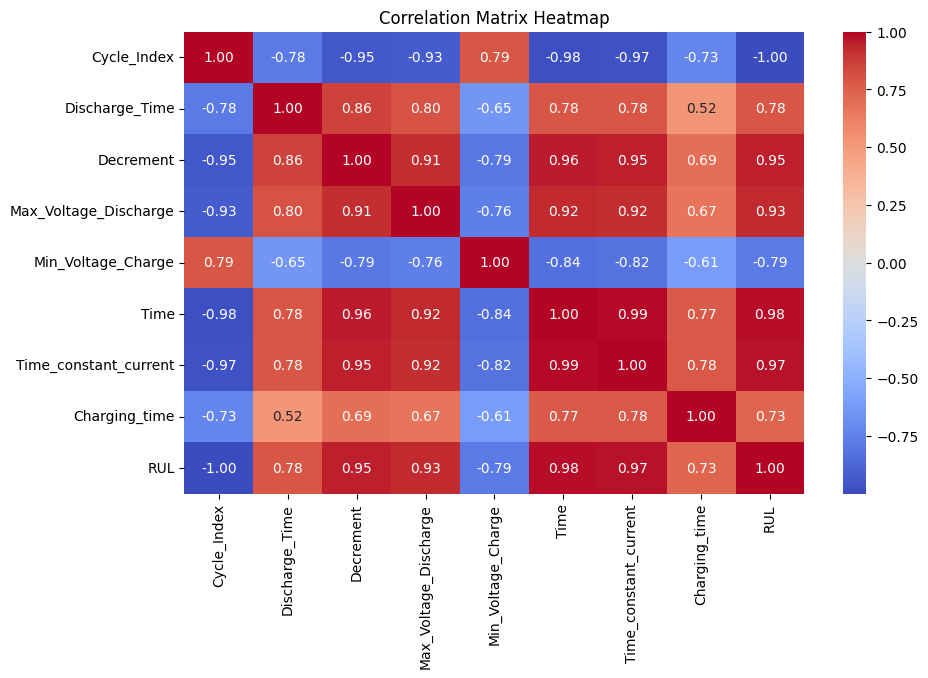

In [ ]:
# Calculate Correlation Matrix
correlation_matrix = df.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
decision_tree_preds = decision_tree_model.predict(X_test)



In [ ]:
# Training time calculation
start_time = time.time()
decision_tree_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Prediction time calculation
start_time = time.time()
decision_tree_preds = decision_tree_model.predict(X_test)
prediction_time = time.time() - start_time

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, decision_tree_preds)
mae = mean_absolute_error(y_test, decision_tree_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, decision_tree_preds)

In [ ]:
# Print evaluation metrics
print("Evaluation Metrics for Decision Tree:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for Decision Tree:
MSE: 25.471261787157612
MAE: 2.301526717557252
RMSE: 5.046906159931806
R2: 0.9997525094564642
Training Time: 0.10534000396728516 seconds
Prediction Time: 0.0028955936431884766 seconds


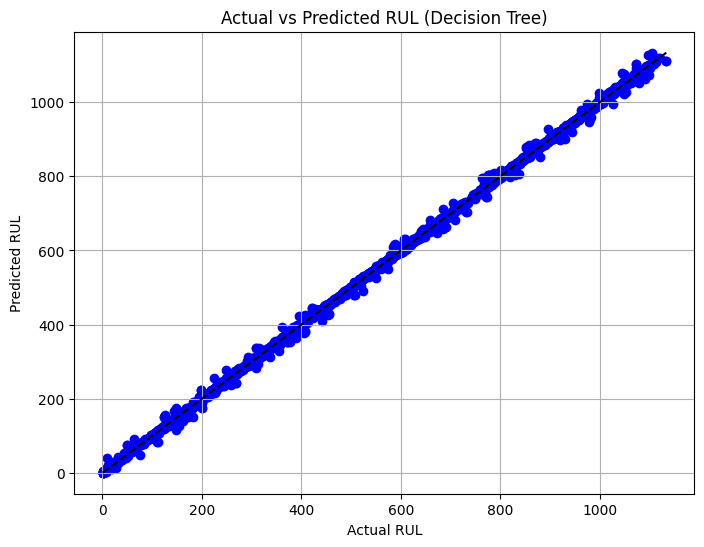

In [ ]:
# Plot actual vs predicted RUL
plt.figure(figsize=(8, 6))
plt.scatter(y_test, decision_tree_preds, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (Decision Tree)')
plt.grid(True)
plt.show()

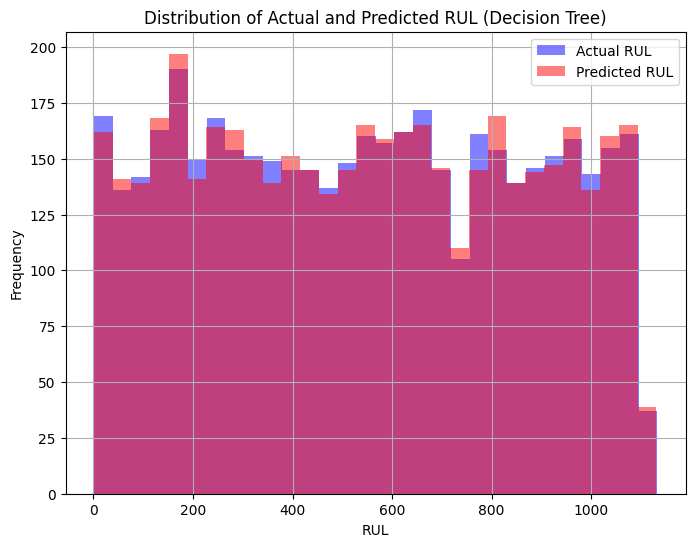

In [ ]:
# Plot histogram distribution of actual and predicted RUL
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual RUL')
plt.hist(decision_tree_preds, bins=30, alpha=0.5, color='red', label='Predicted RUL')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted RUL (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()

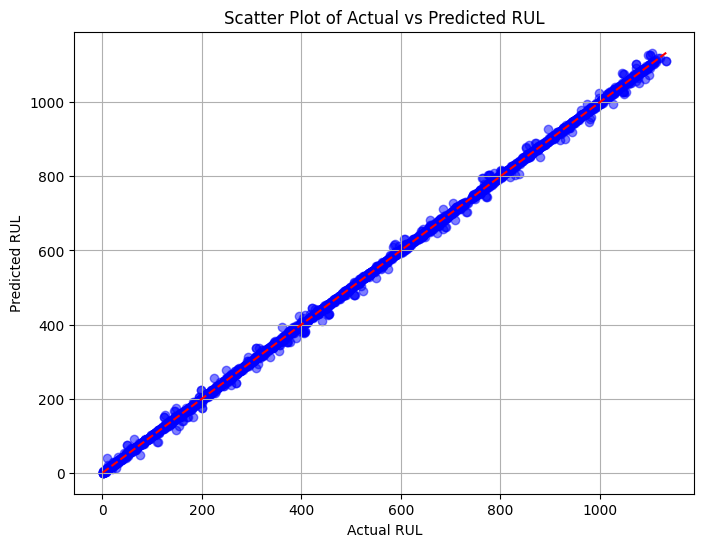

In [ ]:
# Plot scatterplot distribution of actual and predicted RUL
plt.figure(figsize=(8, 6))
plt.scatter(y_test, decision_tree_preds, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Scatter Plot of Actual vs Predicted RUL')
plt.grid(True)
plt.show()


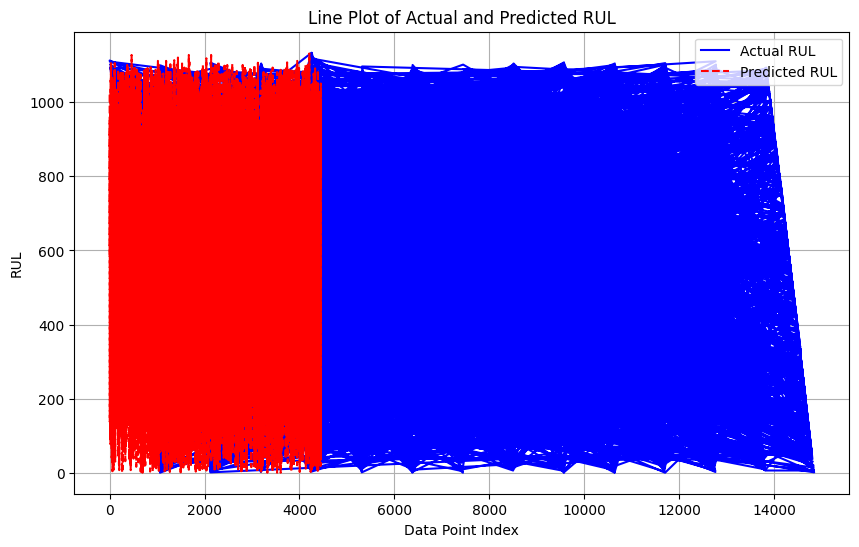

In [ ]:
# Plot Lineplot distribution of actual and predicted RUL
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual RUL', color='blue')
plt.plot(decision_tree_preds, label='Predicted RUL', color='red', linestyle='dashed')
plt.xlabel('Data Point Index')
plt.ylabel('RUL')
plt.title('Line Plot of Actual and Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()


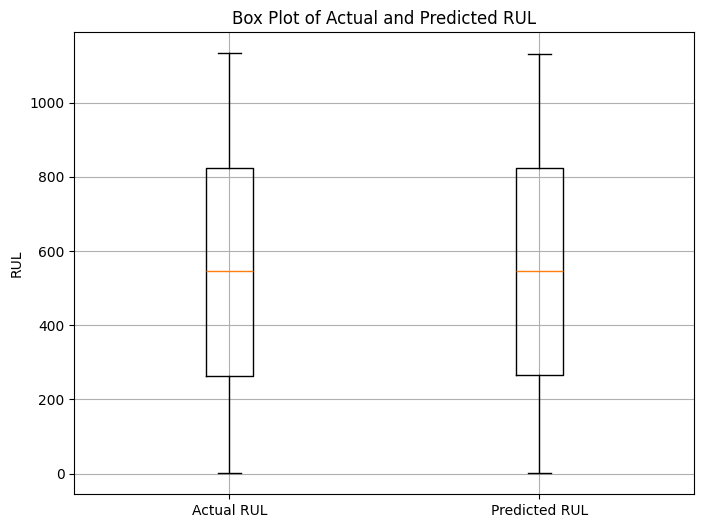

In [ ]:
# Plot Boxplot distribution of actual and predicted RUL
plt.figure(figsize=(8, 6))
plt.boxplot([y_test, decision_tree_preds], labels=['Actual RUL', 'Predicted RUL'])
plt.ylabel('RUL')
plt.title('Box Plot of Actual and Predicted RUL')
plt.grid(True)
plt.show()


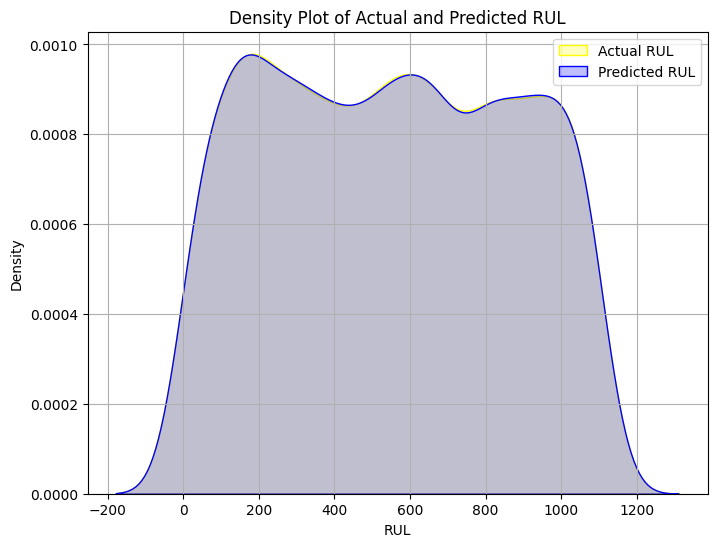

In [ ]:
# Plot Densityplot distribution of actual and predicted RUL
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual RUL', shade=True, color='yellow')
sns.kdeplot(decision_tree_preds, label='Predicted RUL', shade=True, color='Blue')
plt.xlabel('RUL')
plt.title('Density Plot of Actual and Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()


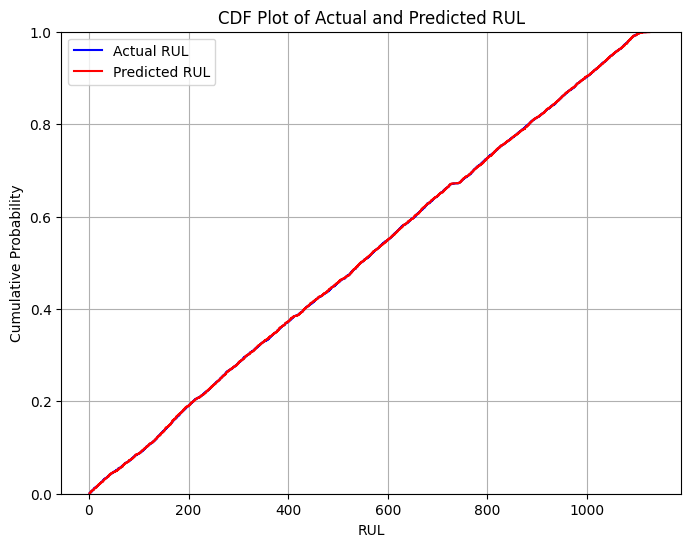

In [ ]:
# Plot Cumulative Distribution Function(CDF) distribution of actual and predicted RUL
plt.figure(figsize=(8, 6))
sns.ecdfplot(y_test, label='Actual RUL', color='blue')
sns.ecdfplot(decision_tree_preds, label='Predicted RUL', color='red')
plt.xlabel('RUL')
plt.ylabel('Cumulative Probability')
plt.title('CDF Plot of Actual and Predicted RUL')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Print evaluation metrics for data
print("Evaluation Metrics for Decision Tree:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"Training Time: {training_time} seconds")
print(f"Prediction Time: {prediction_time} seconds")

Evaluation Metrics for Decision Tree:
MSE: 25.471261787157612
RMSE: 5.046906159931806
MAE: 2.301526717557252
R2: 0.9997525094564642
Training Time: 0.10534000396728516 seconds
Prediction Time: 0.0028955936431884766 seconds


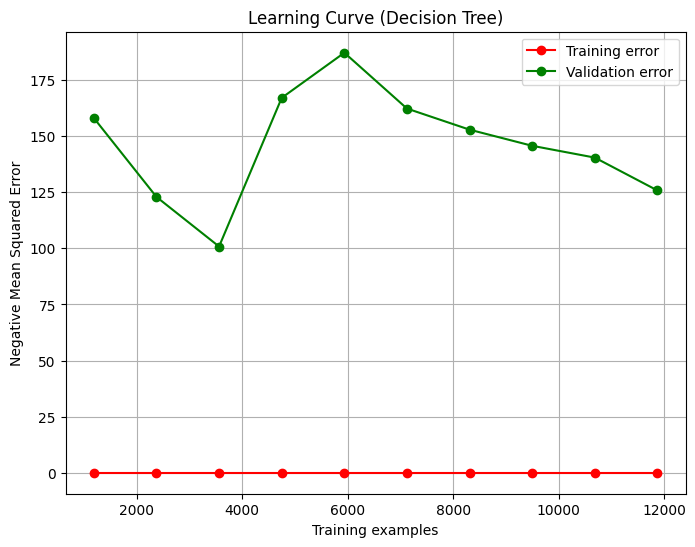

In [ ]:
# Define function to plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='neg_mean_squared_error', cv=5)
    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training examples')
    plt.ylabel('Negative Mean Squared Error')
    plt.title('Learning Curve (Decision Tree)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curve for Decision Tree
plot_learning_curve(decision_tree_model, X, y)

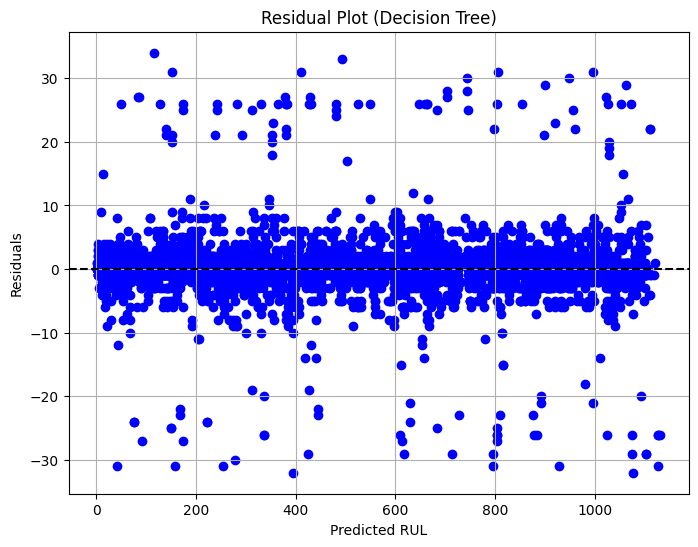

In [ ]:
# Calculate residuals
residuals = y_test - decision_tree_preds

# Plot residual plot
plt.figure(figsize=(8, 6))
plt.scatter(decision_tree_preds, residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted RUL')
plt.ylabel('Residuals')
plt.title('Residual Plot (Decision Tree)')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Function to get user input
def get_user_input():
    Cycle_Index = float(input("Enter Cycle Index: "))
    Discharge_Time = float(input("Enter Discharge Time (s): "))
    Decrement = float(input("Enter Decrement 3.6-3.4V (s): "))
    Max_Voltage_Discharge = float(input("Enter Max Voltage Discharge (V): "))
    Min_Voltage_Charge = float(input("Enter Min Voltage Charge (V): "))
    Time = float(input("Enter Time at 4.15V (s): "))
    Time_constant_current = float(input("Enter Time constant current (s): "))
    Charging_time = float(input("Enter Charging time (s): "))
    return [Cycle_Index, Discharge_Time, Decrement, Max_Voltage_Discharge, Min_Voltage_Charge, Time, Time_constant_current, Charging_time]

# Function to predict RUL using the trained Decision Trees model
def predict_rul(user_features, decision_tree_model):
    # Convert user input into a numpy array for prediction
    user_features_array = np.array([user_features])
    # Predict RUL using the trained model
    predicted_rul = decision_tree_model.predict(user_features_array)[0]
    return predicted_rul

# Function to map RUL to battery health categories
def map_to_battery_health(rul):
    if rul >= 741:
        return 'Excellent Battery Health'
    elif rul >= 371:
        return 'Average Battery Health'
    else:
        return 'Low or Poor Battery Health'

# Function to suggest optimization strategies based on battery health category
def suggest_optimization(category):
    if category == 'Excellent Battery Health':
        suggestions = [
            "Regular Monitoring: Continuously monitor the battery’s performance parameters.",
            "Optimal Charging Practices: Avoid overcharging and deep discharging. Use smart chargers.",
            "Temperature Management: Ensure the battery operates within the optimal temperature range.",
            "Balanced Usage: Ensure cells are balanced if the battery is part of a pack.",
            "Software Updates: Keep battery management software updated."
        ]
    elif category == 'Average Battery Health':
        suggestions = [
            "Conditioning Cycles: Perform controlled charging and discharging cycles.",
            "Reduced Load: Lower the load on the battery whenever possible.",
            "Partial Charging: Maintain the battery’s state of charge between 20% and 80%.",
            "Routine Maintenance: Regularly clean and check connections and terminals.",
            "Usage Adjustments: Adjust usage patterns to avoid high-drain scenarios."
        ]
    else:  # Low or Poor Battery Health
        suggestions = [
            "Capacity Testing: Regularly test the battery’s capacity.",
            "Load Reduction: Significantly reduce the load to prevent sudden failures.",
            "Refurbishment: Consider battery refurbishment options.",
            "Preemptive Replacement: Replace the battery to avoid unexpected failures.",
            "Recycling: Ensure proper recycling procedures for disposed batteries."
        ]
    return suggestions

# Get user input for features
user_features = get_user_input()

# Predict RUL based on user input
predicted_rul = predict_rul(user_features, decision_tree_model)

# Map the predicted RUL to a battery health category
predicted_health_category = map_to_battery_health(predicted_rul)

# Suggest optimization strategies based on the battery health category
optimization_suggestions = suggest_optimization(predicted_health_category)

# Display the results
print("\nThe Predicted Remaining Useful Life (RUL) of your battery is {:.2f}".format(predicted_rul))
print("This estimate is a rough approximation and actual RUL can vary based on various factors including usage patterns, temperature, and charging habits.")
print("The battery health category is:", predicted_health_category)
print("Optimization Strategies:")
for suggestion in optimization_suggestions:
    print(f"- {suggestion}")


Enter Cycle Index: 1104
Enter Discharge Time (s): 777.12
Enter Decrement 3.6-3.4V (s): 182.6
Enter Max Voltage Discharge (V): 3.7
Enter Min Voltage Charge (V): 3.74
Enter Time at 4.15V (s): 929.9
Enter Time constant current (s): 1412
Enter Charging time (s): 6700.2

The Predicted Remaining Useful Life (RUL) of your battery is 9.00
This estimate is a rough approximation and actual RUL can vary based on various factors including usage patterns, temperature, and charging habits.
The battery health category is: Low or Poor Battery Health
Optimization Strategies:
- Capacity Testing: Regularly test the battery’s capacity.
- Load Reduction: Significantly reduce the load to prevent sudden failures.
- Refurbishment: Consider battery refurbishment options.
- Preemptive Replacement: Replace the battery to avoid unexpected failures.
- Recycling: Ensure proper recycling procedures for disposed batteries.


Feature Importance for Decision Tree Model:
                 Feature  Importance
0            Cycle_Index    0.999524
3  Max_Voltage_Discharge    0.000110
4     Min_Voltage_Charge    0.000076
2              Decrement    0.000068
1         Discharge_Time    0.000067
7          Charging_time    0.000063
5           Time_at_415V    0.000053
6  Time_constant_current    0.000038


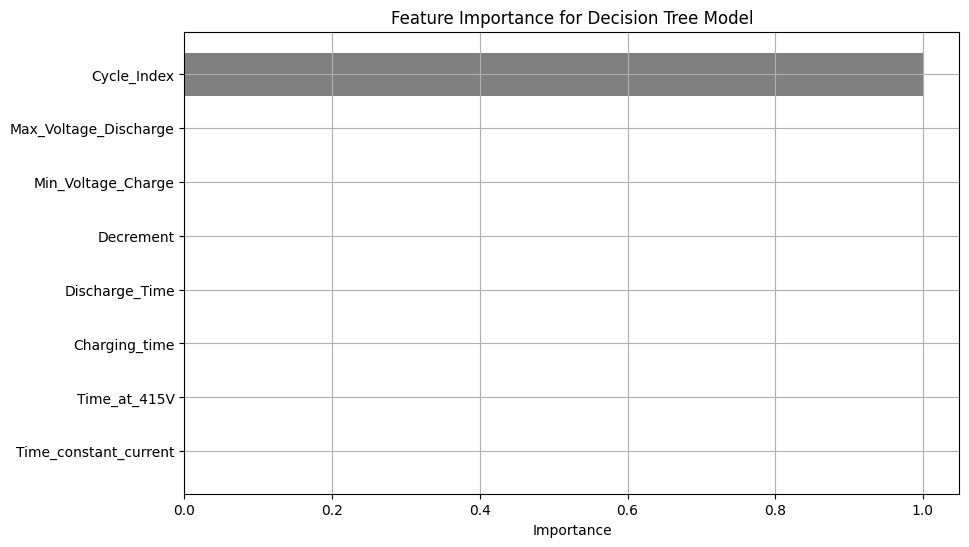

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate and plot feature importance for the Decision Tree model
def plot_feature_importance(decision_tree_model, feature_names):
    # Get the feature importance from the trained Decision Tree model
    importance = decision_tree_model.feature_importances_

    # Create a DataFrame to organize the feature names and their corresponding importance
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

    # Sort the DataFrame by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the feature importance
    print("Feature Importance for Decision Tree Model:")
    print(importance_df)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='grey')
    plt.xlabel('Importance')
    plt.title('Feature Importance for Decision Tree Model')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming 'decision_tree_model' is your trained Decision Tree model
# and 'feature_names' is the list of feature names used in the model
feature_names = ['Cycle_Index', 'Discharge_Time', 'Decrement', 'Max_Voltage_Discharge',
                 'Min_Voltage_Charge', 'Time_at_415V', 'Time_constant_current', 'Charging_time']

# Plot and display feature importance
plot_feature_importance(decision_tree_model, feature_names)
